In [12]:
from keras.datasets import imdb 

<h2>Prepare data</h2>

In [13]:
#Load imdb datasets 
(train_data, train_label),(test_data, test_label) = imdb.load_data(num_words=10000)

In [14]:
train_data.shape

(25000,)

In [15]:
#train_label 1 is positive 0 negetive 
train_label[0]

1

In [16]:
max(max(sequence for sequence in train_data))

9995

In [17]:
word_index = imdb.get_word_index()

In [18]:
#word_index

In [19]:
#reverse and mapping data
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [20]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [21]:
decode_review = ' '.join([reverse_word_index.get(i - 3,'?') for i in train_data[0]])

In [22]:
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [24]:
#Encoding the integer sequences in to binary matrix 
import numpy as np 

#convert list integer to binary matrix 
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)


MemoryError: 

In [33]:
x_train[0].shape

(10000,)

In [32]:
#You should also vectorize your labels, which is straightforward:
y_train = np.asarray(train_label).astype('float32')
y_test  = np.asarray(test_label).astype('float32')
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [34]:
#Build model 
#book recomment Dense layer=16 because the label have to class 0 or 1 is good for avtivation='relu' and 16 layer hidden

from keras import models 
from keras import layers  

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) #same input feature 
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [39]:
#choose loass fucntion to use 
#use binary_crossentropy  to useit classification problem

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])


In [40]:
#Configuring the optimizer 

# from keras import optimizers
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
# loss='binary_crossentropy',
# metrics=['accuracy'])

In [41]:
#Using custom losses and metrics 

# from keras import losses
# from keras import metrics
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
# loss=losses.binary_crossentropy,
# metrics=[metrics.binary_accuracy])

In [46]:
#Validating your approach 

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]



<h2>Training model With State of Art</h2>

In [74]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.0208 - acc: 0.9939 - val_loss: 0.0211 - val_acc: 0.9952
Epoch 2/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.0124 - acc: 0.9979 - val_loss: 0.0358 - val_acc: 0.9874
Epoch 3/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.0080 - acc: 0.9991 - val_loss: 0.0307 - val_acc: 0.9902
Epoch 4/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.0095 - acc: 0.9981 - val_loss: 0.0523 - val_acc: 0.9792
Epoch 5/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.0095 - acc: 0.9973 - val_loss: 0.0519 - val_acc: 0.9807
Epoch 6/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.0029 - acc: 0.9999 - val_loss: 0.0639 - val_acc: 0.9782
Epoch 7/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.0043 - acc: 0.9994 - val_loss: 0.0761 - 

In [75]:
#evaluate 
results_a = model.evaluate(x_test,y_test)
results_a

25000/25000 [==============================] - 2s 83us/step


[1.3184640741595626, 0.84416]

<h2>Plot Graph Loss fucntion</h2>

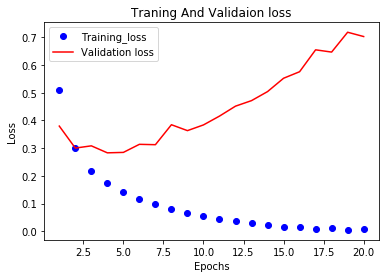

In [66]:
import matplotlib.pyplot as plt 
history_dict = history.history
loss_values  = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label='Training_loss') #bo is blue dot
plt.plot(epochs, val_loss_values, 'r', label="Validation loss") #b is solid blue line 
plt.title("Traning And Validaion loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


<h2>Plot Graph Accuracy fucntion</h2>

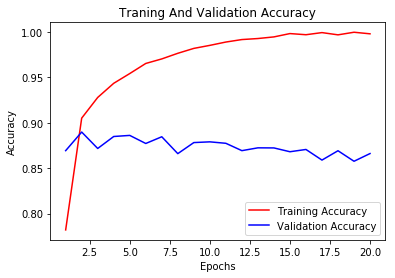

In [69]:
plt.clf() #clear figure
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc,'r',label="Training Accuracy ")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.title("Traning And Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<h2>Train model From Scratch</h2>

In [85]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,))) #tanh , relu 
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',  #and mes
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=512)


Epoch 1/20
25000/25000 [==============================] - 3s 101us/step - loss: 0.4422 - acc: 0.8266
Epoch 2/20
25000/25000 [==============================] - 2s 86us/step - loss: 0.2515 - acc: 0.9128
Epoch 3/20
25000/25000 [==============================] - 2s 86us/step - loss: 0.1870 - acc: 0.9339
Epoch 4/20
25000/25000 [==============================] - 2s 86us/step - loss: 0.1496 - acc: 0.9475
Epoch 5/20
25000/25000 [==============================] - 2s 86us/step - loss: 0.1303 - acc: 0.9564
Epoch 6/20
25000/25000 [==============================] - 2s 87us/step - loss: 0.1143 - acc: 0.9604
Epoch 7/20
25000/25000 [==============================] - 2s 88us/step - loss: 0.1003 - acc: 0.9679
Epoch 8/20
25000/25000 [==============================] - 2s 87us/step - loss: 0.0923 - acc: 0.9707
Epoch 9/20
25000/25000 [==============================] - 2s 91us/step - loss: 0.0803 - acc: 0.9757
Epoch 10/20
25000/25000 [==============================] - 2s 87us/step - loss: 0.0751 - acc: 0.977

In [86]:
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 2s 80us/step


[0.7261296743285656, 0.84464]

<h2>Use trainned Model for Predict new data</h2>

In [87]:
model.predict(x_test)

array([[0.00295966],
       [0.9992366 ],
       [0.9990489 ],
       ...,
       [0.00784658],
       [0.00458719],
       [0.99366564]], dtype=float32)